In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
import rasterio
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

from skimage import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedShuffleSplit
# %matplotlib inline

In [2]:
#read path to dataset
#image
img_path = 'Opt_SAR_Stack.tif'
#traing and test dataset
tp_src = gp.read_file('sgcplot.shp')
tp_crop = gp.read_file('croplabel.shp')
tp_ncrop = gp.read_file('noncroplabel.shp')


In [3]:
#open image and display the properties
dataset = rasterio.open(img_path)
print(dataset.count,
      dataset.width, dataset.height, dataset)

20 2097 1718 <open DatasetReader name='Opt_SAR_Stack.tif' mode='r'>


In [4]:
# combine labels (crop and noncrop; 1&0) into a single dataframe
class_label = tp_src.append(tp_crop)
class_label

,label,geometry
0,1,"POLYGON Z ((34.32728 -0.78805 0.00000, 34.3272..."
1,1,"POLYGON Z ((34.33106 -0.78646 0.00000, 34.3312..."
2,1,"POLYGON Z ((34.33147 -0.78711 0.00000, 34.3312..."
3,1,"POLYGON Z ((34.33124 -0.78655 0.00000, 34.3313..."
4,1,"POLYGON Z ((34.32901 -0.79136 0.00000, 34.3292..."
...,...,...
73,0,"POLYGON Z ((34.30505 -0.79169 0.00000, 34.3052..."
74,0,"POLYGON Z ((34.30445 -0.78910 0.00000, 34.3048..."
75,0,"POLYGON Z ((34.30418 -0.79060 0.00000, 34.3044..."
76,0,"POLYGON Z ((34.29990 -0.78495 0.00000, 34.3004..."


In [5]:
# labels to projected coordinate system, needed to generate the centroid of each polygon
proj_label = class_label.to_crs(32736)

In [6]:
#generate centroid of each polygon, overwrite the polygon geometry
proj_label['geometry'] = proj_label.centroid
proj_label

,label,geometry
0,1,POINT (647704.754 9912909.883)
1,1,POINT (648127.708 9913085.215)
2,1,POINT (648148.619 9912992.938)
3,1,POINT (648144.631 9913074.193)
4,1,POINT (647908.838 9912551.434)
...,...,...
73,0,POINT (645238.553 9912506.809)
74,0,POINT (645190.505 9912762.785)
75,0,POINT (645147.033 9912615.394)
76,0,POINT (644690.850 9913223.074)


<AxesSubplot:>

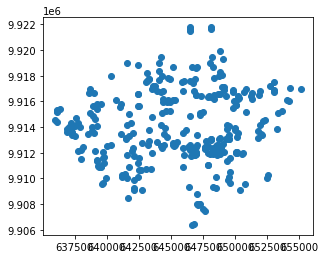

In [7]:
proj_label.plot()

In [8]:
#Extract/sample the value of raster into label point data
coord_list = [(x,y) for x,y in zip(proj_label['geometry'].x , proj_label['geometry'].y)]
proj_label['value'] = [x for x in dataset.sample(coord_list)]
proj_label.head()

,label,geometry,value
0,1,POINT (647704.754 9912909.883),"[0.04545, 0.0758, 0.0667, 0.2591, 0.1243740000..."
1,1,POINT (648127.708 9913085.215),"[0.049, 0.07445, 0.06625, 0.2262, 0.1223320000..."
2,1,POINT (648148.619 9912992.938),"[0.04445, 0.07015, 0.0604, 0.2401, 0.118511500..."
3,1,POINT (648144.631 9913074.193),"[0.0457, 0.07035, 0.0629, 0.2227, 0.1150015000..."
4,1,POINT (647908.838 9912551.434),"[0.04185, 0.0702, 0.05485, 0.2338, 0.111741000..."


In [9]:
temp = list(proj_label['value'])
temp[0][0]

0.04545

In [10]:
#A litte data restructuring 
#TODO automate the process, if possible
b01 = []
b02 = []
b03 = []
b04 = []
b05 = []
b06 = []
b07 = []
b08 = []
b09 = []
b10 = []
b11 = []
b12 = []
b13 = []
b14 = []
b15 = []
b16 = []
b17 = []
b18 = []
b19 = []
b20 = []

for i in temp:
    b01.append(i[0])
    b02.append(i[1])
    b03.append(i[2])
    b04.append(i[3])
    b05.append(i[4])
    b06.append(i[5])
    b07.append(i[6])
    b08.append(i[7])
    b09.append(i[8])
    b10.append(i[9])
    b11.append(i[10])
    b12.append(i[11])
    b13.append(i[12])
    b14.append(i[13])
    b15.append(i[14])
    b16.append(i[15])
    b17.append(i[16])
    b18.append(i[17])
    b19.append(i[18])
    b20.append(i[19])   
        

In [11]:
#rename each column
proj_label["B2"] = b01
proj_label["B3"] = b02
proj_label["B4"] = b03
proj_label["B8"] = b04
proj_label["B5"] = b05
proj_label["B6"] = b06
proj_label["B7"] = b07
proj_label["B8A"] = b08
proj_label["B9"] = b09
proj_label["B11"] = b10
proj_label["B12"] = b11
proj_label["NDVI"] = b12
proj_label["EVI"] = b13
proj_label["GCVI"] = b14
proj_label["RDGCVI"] = b15
proj_label["NDWI"] = b16
proj_label["VH"] = b17
proj_label["VV"] = b18
proj_label["Sarrtio"] = b19
proj_label["Sardiff"] = b20

In [12]:
proj_label = proj_label.drop(columns=['value'])
proj_label

,label,geometry,B2,B3,B4,B8,B5,B6,B7,B8A,...,B12,NDVI,EVI,GCVI,RDGCVI,NDWI,VH,VV,Sarrtio,Sardiff
0,1,POINT (647704.754 9912909.883),0.04545,0.07580,0.06670,0.2591,0.124374,0.236074,0.265724,0.297274,...,0.155674,0.590546,0.364829,2.418206,1.083233,0.600826,-21.549180,-12.910029,0.599096,8.639151
1,1,POINT (648127.708 9913085.215),0.04900,0.07445,0.06625,0.2262,0.122332,0.198332,0.222282,0.247182,...,0.158032,0.546931,0.318321,2.038281,0.849066,0.698638,-19.474336,-12.183802,0.625634,7.290534
2,1,POINT (648148.619 9912992.938),0.04445,0.07015,0.06040,0.2401,0.118512,0.217662,0.242462,0.271912,...,0.126662,0.598003,0.353984,2.422666,1.025964,0.527536,-16.047149,-12.000251,0.747812,4.046898
3,1,POINT (648144.631 9913074.193),0.04570,0.07035,0.06290,0.2227,0.115002,0.202402,0.225952,0.256402,...,0.143102,0.559524,0.317732,2.165601,0.936496,0.642575,-17.945788,-13.219556,0.736638,4.726232
4,1,POINT (647908.838 9912551.434),0.04185,0.07020,0.05485,0.2338,0.111741,0.208141,0.238641,0.263541,...,0.116941,0.619955,0.358179,2.330484,1.092339,0.500175,-17.199371,-10.078882,0.586003,7.120489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,POINT (645238.553 9912506.809),0.05010,0.07735,0.07335,0.2029,0.114975,0.186875,0.218625,0.237925,...,0.155325,0.468959,0.255573,1.623142,0.764739,0.765522,-19.548346,-9.318982,0.476715,10.229364
74,0,POINT (645190.505 9912762.785),0.03850,0.07300,0.05540,0.2402,0.104410,0.218310,0.249110,0.276210,...,0.092710,0.625169,0.359855,2.290411,1.300546,0.385970,-16.966642,-9.977045,0.588039,6.989597
75,0,POINT (645147.033 9912615.394),0.03780,0.06955,0.04405,0.2953,0.098493,0.250543,0.304593,0.335643,...,0.078793,0.740386,0.492222,3.245866,1.998183,0.266824,-14.890339,-9.215072,0.618862,5.675267
76,0,POINT (644690.850 9913223.074),0.04025,0.06285,0.05680,0.1824,0.103031,0.171181,0.194981,0.209481,...,0.116581,0.525084,0.257098,1.902148,0.770341,0.639150,-21.037144,-11.288720,0.536609,9.748424


In [13]:
# define data
X = proj_label.drop(columns=["label", "geometry"])
y = proj_label["label"]

In [14]:
label = np.unique(y)
n = len(label)

In [15]:
print(f"The dataset contains {X.shape[0]} samples and "
      f"{X.shape[1]} features")

The dataset contains 323 samples and 20 features


In [16]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    X, y, random_state=42, test_size=0.25)

In [17]:
print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / X.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 81 => 25.1% of the original set


In [18]:
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / X.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in training: 242 => 74.9% of the original set


In [19]:
# Random forest classifier

rf = RandomForestClassifier(n_estimators=500, oob_score = True)
rf = rf.fit(X,y)